<a href="https://colab.research.google.com/github/jinwon1234/aipython/blob/main/240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

• 붓꽃 데이터 읽어와서 확인하기
1. 데이터 파일 읽어오기
2. 데이터의 기본 정보 출력
3. 데이터의 기초 통계량 출력
4. 픔종별 개수 구하기


In [47]:
iris = pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

• 붓꽃 데이터 전처리
1. 결측치 학인하기
2. 중복 데이터 확인하기
3. 중복 데이터 모두 확인하기
4. 중복 데이터 삭제하기


In [50]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [52]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [53]:
idx = (iris['sepal_length'] == 5.8) & (iris['petal_width'] == 1.9)
iris.loc[idx,:]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [54]:
iris_drop = iris.drop_duplicates()
iris_drop

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
iris_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


• 붓꽃 데이터 그룹핑
1. 품종(species) 열을 기준으로 합계 구하기
2. 품종(species) 열을 기준으로 평균 구하기


In [55]:
iris_drop.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [56]:
iris_drop.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


• 붓꽃 데이터 시각화
1. 막대 그래프 그리기
-꽃받침 길이의 시각화
-붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화
2. 히스토그램 그래프 그리기
-각 특징(4가지) 값들의 빈도수에 대한 시각화
3. 산점도 그래프 그리기
-꽃받침의 길이와 꽃잎의 길이의 산점도를 시각화

Text(0.5, 1.0, 'Sepal Length Visualization')

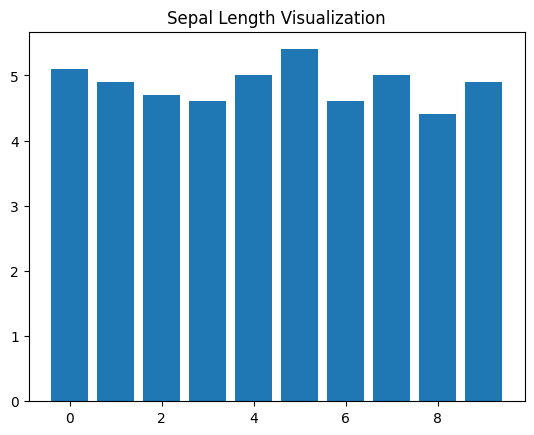

In [66]:
plt.bar(iris_drop.index[:10], iris['sepal_length'][:10])
plt.title('Sepal Length Visualization')

Text(0, 0.5, 'Speal Length')

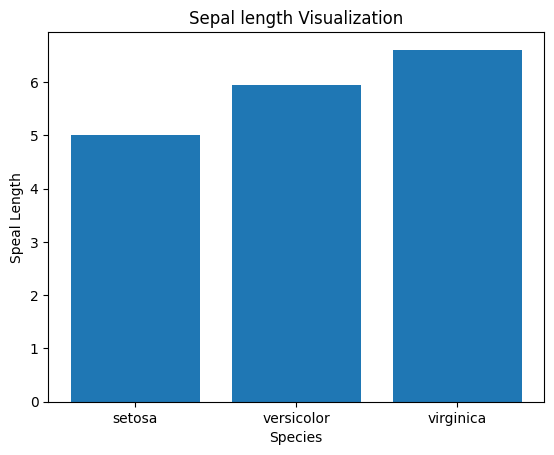

In [69]:
df2 = iris_drop.groupby('species').mean()
plt.bar(df2.index, df2['sepal_length'])
plt.title('Sepal length Visualization')
plt.xlabel('Species')
plt.ylabel('Speal Length')

Text(0.5, 1.0, 'petal_length')

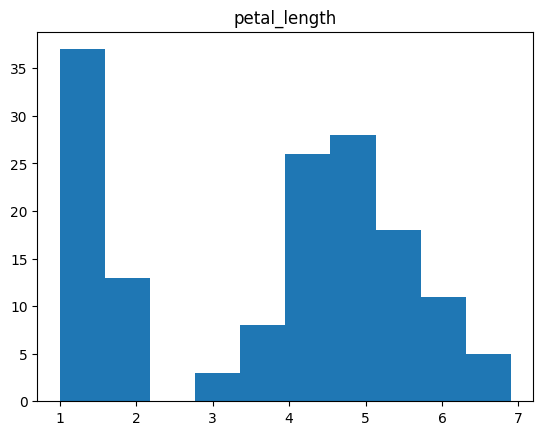

In [59]:
plt.hist(iris_drop['petal_length'])
plt.title('petal_length')

Text(0.5, 1.0, 'petal_width')

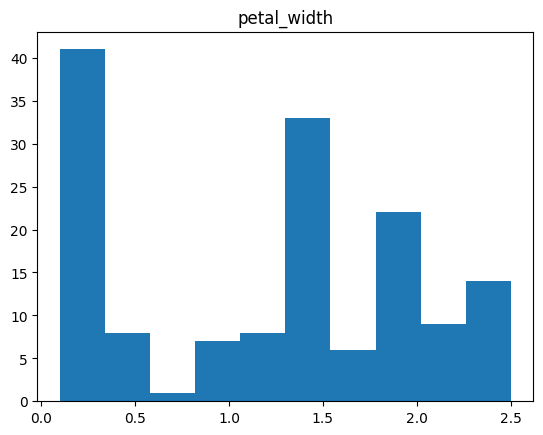

In [60]:
plt.hist(iris_drop['petal_width'])
plt.title('petal_width')

Text(0.5, 1.0, 'sepal_length')

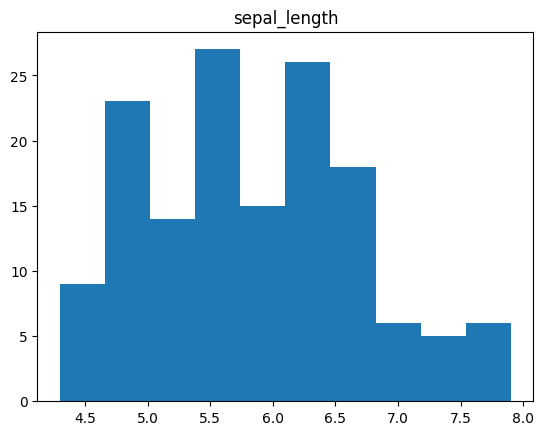

In [61]:
plt.hist(iris_drop['sepal_length'])
plt.title('sepal_length')

Text(0.5, 1.0, 'sepal_width')

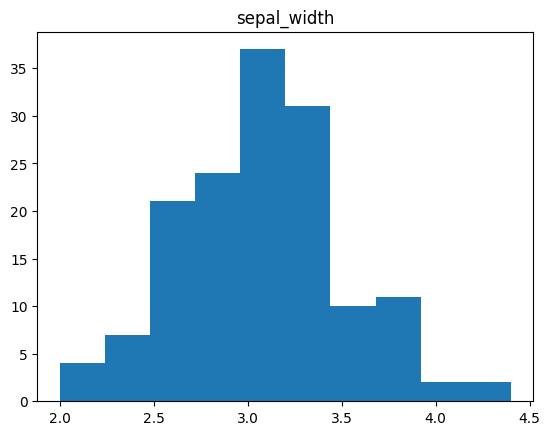

In [62]:
plt.hist(iris_drop['sepal_width'])
plt.title('sepal_width')

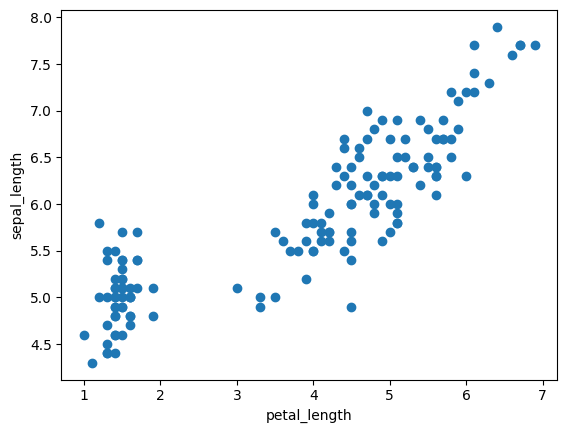

In [63]:
plt.scatter(iris_drop['petal_length'],iris_drop['sepal_length'])
plt.xlabel('petal_length')
plt.ylabel('sepal_length')
plt.show()